# Data acquisition.

Four datasets for ligand-receptor:https://github.com/Xwhut/CellDialog/tree/main/dataset.  
Single cell RNA sequencing data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi. (GEO accession: GSE72056).   
Users can also use their own ligand-receptor and single cell RNA sequencing datasets.

# Ligand-receptor data feature extraction.

iFeature：https://github.com/Superzchen/iFeature   
iFeature online tool :https://ifeature.erc.monash.edu/

# Ligand-receptor feature selection and interaction prediction.  
### Users can also directly use their own ligand-receptor dataset.

Run python code/CellDialog.py to get high confidence ligand-receptor data.

In [1]:
import pandas as pd
import numpy as np

# Ligand-receptor dataset.

In [2]:
LRI = pd.read_csv("LRI.csv", header=None, index_col=None).to_numpy() # Selected ligand receptor data with a probability greater than 0.999
print(LRI)

[['SEMA3F' 'PLXNA3']
 ['SEMA3F' 'PLXNA1']
 ['SEMA3F' 'NRP1']
 ...
 ['GDF10' 'ACVR2B']
 ['APELA' 'MTNR1A']
 ['APELA' 'GRM7']]


# Single-cell RNA sequencing data preprocessing.

### rows indicate genes and columns indicate cell types (the first row is numbered, e.g. 1 for T cells and 2 for B cells,......, the number 5 stands for CAFs......) ，Others are expression values.

See code/Processing_scRNA-seq_data.py for details

In [3]:
single_cell = pd.read_csv("GSE72056.csv", header=None, index_col=None, nrows=10).to_numpy()  # Read the scRNA-seq data
print(single_cell)

[['cell_type' 2.0 1.0 ... 1.0 1.0 1.0]
 ['C9orf152' 0.0 0.0 ... 0.0 0.0 0.0]
 ['RPS11' 9.2172 8.3745 ... 4.9262 7.0958 3.997]
 ...
 ['TMEM216' 0.0 0.0 ... 0.0 0.0 0.0]
 ['TRAF3IP2-AS1' 2.8514 2.0983 ... 1.6988 1.5589 0.47125]
 ['LRRC37A5P' 0.0 0.0 ... 0.0 0.0 0.0]]


In [4]:
# Taking the expression threshold method as an example, the melanoma single cell data set is 7 cell types. 
# If the single-cell RNA sequencing data specified by the user is 8 cell types, only one column needs to be added, and vice versa.
cell_type = np.delete(single_cell[0], 0)
single_cell = single_cell[1:]
malignant = [i for i, x in enumerate(cell_type) if x == 0]
T = [i for i, x in enumerate(cell_type) if x == 1]
B = [i for i, x in enumerate(cell_type) if x == 2]
Mac = [i for i, x in enumerate(cell_type) if x == 3]
End = [i for i, x in enumerate(cell_type) if x == 4]
CAF = [i for i, x in enumerate(cell_type) if x == 5]
NK = [i for i, x in enumerate(cell_type) if x == 6]
#celltype = [i for i, x in enumerate(cell_type) if x == 7]
gene = single_cell[:, [0]]
gene_data = np.delete(single_cell, 0, axis=1)

row_sums = np.sum(gene_data, axis=1)/gene_data.shape[1]
gene_data_float = gene_data.astype(float)
std = np.std(gene_data_float, axis=1)
total = row_sums + std

malignant_means = np.mean(gene_data[:, malignant], axis=1)
new_arr_0 = [1 if x > y else 0 for x, y in zip(malignant_means, total)]
T_means = np.mean(gene_data[:, T], axis=1)
new_arr_1 = [1 if x > y else 0 for x, y in zip(T_means, total)]
B_means = np.mean(gene_data[:, B], axis=1)
new_arr_2 = [1 if x > y else 0 for x, y in zip(B_means, total)]
Mac_means = np.mean(gene_data[:, Mac], axis=1)
new_arr_3 = [1 if x > y else 0 for x, y in zip(Mac_means, total)]
End_means = np.mean(gene_data[:, End], axis=1)
new_arr_4 = [1 if x > y else 0 for x, y in zip(End_means, total)]
CAF_means = np.mean(gene_data[:, CAF], axis=1)
new_arr_5 = [1 if x > y else 0 for x, y in zip(CAF_means, total)]
NK_means = np.mean(gene_data[:, NK], axis=1)
new_arr_6 = [1 if x > y else 0 for x, y in zip(NK_means, total)]
#celltype_means = np.mean(gene_data[:, celltype], axis=1)
#new_arr_7 = [1 if x > y else 0 for x, y in zip(celltype_means, total)]

value_thre = np.append(gene, np.expand_dims(new_arr_0, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_1, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_2, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_3, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_4, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_5, axis=0).T, axis=1)
value_thre = np.append(value_thre, np.expand_dims(new_arr_6, axis=0).T, axis=1) 
#value_thre = np.append(value_thre, np.expand_dims(new_arr_7, axis=0).T, axis=1) 

value_thre = pd.DataFrame(value_thre)
value_thre.to_csv('The_expression_thresholding_data.csv', index=False, header=False)
print("-----Threshold data processing completed----")
print("\n")
thr = pd.read_csv("The_expression_thresholding_data.csv", header=None, index_col=None).to_numpy()
print(thr)

-----Threshold data processing completed----


[['C9orf152' 0 0 0 0 0 0 0]
 ['RPS11' 0 0 0 0 0 0 0]
 ['ELMO2' 0 0 0 0 0 0 0]
 ['CREB3L1' 0 0 0 0 0 1 0]
 ['PNMA1' 0 0 0 0 0 0 0]
 ['MMP2' 0 0 0 0 1 1 0]
 ['TMEM216' 0 0 0 0 0 0 0]
 ['TRAF3IP2-AS1' 0 0 0 0 0 0 0]
 ['LRRC37A5P' 0 0 0 0 0 0 0]]


# Prediction of cell-cell communication from ligand-receptor data and single-cell RNA sequencing data.
### Three-point estimation method combining three methods (expression threshold, expression product, cell expression method).

--------------------------------------------------------------
The xxx_result.csv file indicates that 0 represents the Melanoma cancer cells,
1 represents the T cells,
2 represents the B cells,
3 represents the Macrophages,
4 represents the Endothelial cells,
5 represents the CAFs,
6 represents the NK cells.
For example: 12_xxx represents the communication between T cells and B cells, and xxx is the calculated communication strength. 
-----CellDialog Run Completed----


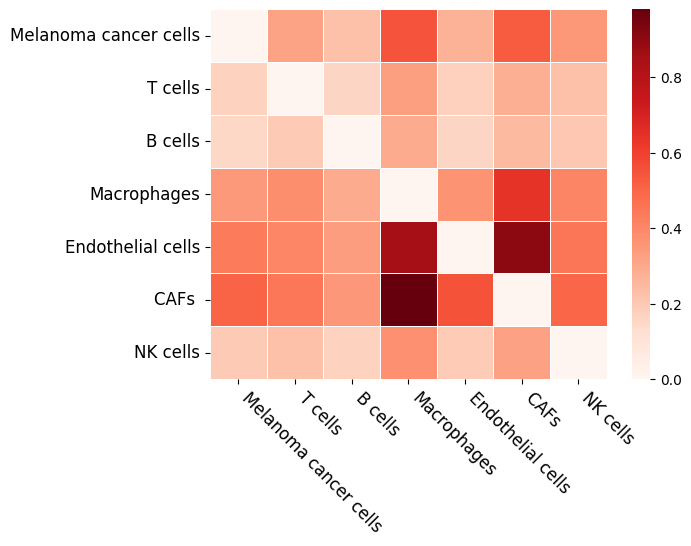

In [6]:
%run example/The_three-point_estimation_method.py

#  The number of LRIs mediating corresponding CCC.

-----The number of LRIs mediating corresponding CCC----


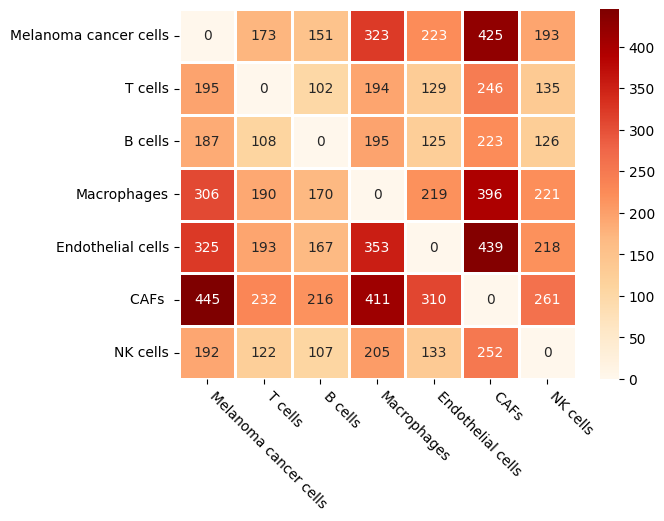

In [7]:
%run example/The_number_of_LRIs.py

# Read all result files.

Folders: expression_thresholding,cell_expression,expression_product,melanoma_case_study.csv represent detailed result files for the submethods and three-point estimates.  
XXX_LRi_num.csv file: cell_LRi_num.csv,pro_LRi_num.csv,Three_LRi_num.csv indicates the number of LRIs mediating cell-cell communication.  
Result.csv file: thresholding_result.csv,cell_result.csv,product_result.csv,melanoma_case_study.csv Indicates the final result.

In [9]:
# Obtain the result file in the current working directory
path = "melanoma"
files = os.listdir(path)
for file in files:
    print(file)

cell_expression
cell_LRi_num.csv
cell_result.csv
expression_product
expression_thresholding
melanoma_case_study.csv
product_result.csv
pro_LRi_num.csv
Three
Three_LRi_num.csv
thresholding_result.csv


# Cell-cell communication related result query example.

### Users can extract the information they need from the result data according to their own needs. Here are some examples:

In [10]:
# Query the results of the three-point estimation method
thr = pd.read_csv("melanoma/melanoma_case_study.csv", header=None, index_col=None).to_numpy()
print(thr)  #

[['cell_type' 'Melanoma cancer cells' 'T cells' 'B cells' 'Macrophages'
  'Endothelial cells' 'CAFs ' 'NK cells']
 ['Melanoma cancer cells' '0.0' '0.32133707691389196' '0.228513950528499'
  '0.5514044003079336' '0.2756109781276324' '0.5293936910850813'
  '0.3560363932070591']
 ['T cells' '0.1721244200600822' '0.0' '0.16039064549974166'
  '0.33171623331647654' '0.17551119764749656' '0.2810512760530413'
  '0.22878740499247405']
 ['B cells' '0.15259129907191354' '0.19559835380830984' '0.0'
  '0.29396348322690113' '0.1577808587502414' '0.24609400870869966'
  '0.20422370573208126']
 ['Macrophages' '0.34776219507877243' '0.3800908050797423'
  '0.2947185370125565' '0.0' '0.36194440936121913' '0.6425974421401272'
  '0.40931945131133585']
 ['Endothelial cells' '0.43833619536438234' '0.4052045022461444'
  '0.3349364333498335' '0.8573177106073709' '0.0' '0.9039693718457994'
  '0.4541922764044774']
 ['CAFs ' '0.5060233417371931' '0.44881506077166594'
  '0.34927394927510197' '0.9803030303030303' '0

In [11]:
# Query the top3LRI the expression product approach [Macrophages---->melanoma](30.csv).  
# The number of LRIs displayed can be adjusted as needed (The first column is ligand receptor, and the second column is fraction).
thr = pd.read_csv("melanoma/expression_product/30.csv", header=None, index_col=None).to_numpy()
sorted_thr = thr[thr[:, 1].argsort()][::-1]
print(sorted_thr[:3])  #

[['B2M_HLA-F' 33.91980853939508]
 ['HLA-A_APLP2' 23.23881546668722]
 ['C1QB_C1QBP' 19.66318695419415]]


In [12]:
# Query the top100LRI the Three point estimation method [CAFs---->melanoma](50.csv).  
# The number of LRIs displayed can be adjusted as needed (The first column is ligand receptor, and the second column is fraction).
thr = pd.read_csv("melanoma/Three/50.csv", header=None, index_col=None).to_numpy()
sorted_thr = thr[thr[:, 1].argsort()][::-1]
print(sorted_thr[:100])  #

[['B2M_HLA-F' 0.9656451251161448]
 ['APP_RPSA' 0.9330275406380928]
 ['HLA-A_APLP2' 0.763447665508088]
 ['PSAP_SORT1' 0.7400243415559513]
 ['APP_ERBB3' 0.6635408982708523]
 ['THBS2_CD47' 0.6547325911845461]
 ['THBS1_CD47' 0.6409879665105901]
 ['GRN_SORT1' 0.6193647391577285]
 ['APP_APLP2' 0.5814893970599486]
 ['C3_CD46' 0.5553439790419425]
 ['COL5A1_SDC3' 0.5380252568670836]
 ['COL1A2_DDR1' 0.537992988320792]
 ['COL1A2_ITGA3' 0.5355764234123784]
 ['COL1A2_ITGB3' 0.5338076535292503]
 ['COL1A1_DDR1' 0.5333117085611315]
 ['COL1A1_ITGA3' 0.5305900176283221]
 ['COL1A1_ITGB3' 0.5290425284896612]
 ['THBS2_NOTCH2' 0.5251787948507618]
 ['COL3A1_DDR1' 0.5214419133831294]
 ['COL3A1_ITGB3' 0.516960136254766]
 ['VIM_LRP1' 0.4934965765737831]
 ['HSP90B1_LDLR' 0.49038220228861]
 ['COL1A2_LRP1' 0.4819306242739536]
 ['APP_NOTCH2' 0.4664228527331542]
 ['CALM2_LDLR' 0.4651239455267099]
 ['DCN_LRP1' 0.464938774468202]
 ['HLA-C_LRP1' 0.4529677142629618]
 ['LAMA2_RPSA' 0.4455017825194916]
 ['COL6A3_ITGB3' 0.